# EDA and Preprocessing

In [1]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

expected_sales, the_number_of_shops = glob('expected_sales/*.csv'), glob('the_number_of_shops/*.csv')
expected_sales, the_number_of_shops

(['expected_sales\\expected_sales_2019.csv',
  'expected_sales\\expected_sales_2020.csv',
  'expected_sales\\expected_sales_2021.csv',
  'expected_sales\\expected_sales_2022.csv',
  'expected_sales\\expected_sales_2023.csv',
  'expected_sales\\expected_sales_2024.csv'],
 ['the_number_of_shops\\the_number_of_shops_2019.csv',
  'the_number_of_shops\\the_number_of_shops_2020.csv',
  'the_number_of_shops\\the_number_of_shops_2021.csv',
  'the_number_of_shops\\the_number_of_shops_2022.csv',
  'the_number_of_shops\\the_number_of_shops_2023.csv',
  'the_number_of_shops\\the_number_of_shops_2024.csv'])

In [ ]:
plt.rcParams['font.family'] == 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.concat(pd.read_csv(i) for i in expected_sales)
df2 = pd.concat(pd.read_csv(i) for i in the_number_of_shops)
df1.shape, df2.shape

((512626, 55), (1831925, 14))

In [3]:
df = df1.merge(
    df2,
    how = 'inner',
    on = ['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명']
)
print(df.shape)
df.head(5)

(512626, 65)


,기준_년분기_코드,상권_구분_코드_x,상권_구분_코드_명,상권_코드_x,상권_코드_명,서비스_업종_코드_x,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,상권_구분_코드_y,상권_코드_y,서비스_업종_코드_y,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,A,골목상권,3110001,이북5도청사,CS100001,한식음식점,400266580,10981,234853786,...,A,3110001,CS100001,11,11,0,0,9,1,0
1,20191,A,골목상권,3110001,이북5도청사,CS100008,분식전문점,52654409,4197,39028949,...,A,3110001,CS100008,3,3,0,0,0,0,0
2,20191,A,골목상권,3110001,이북5도청사,CS100009,호프-간이주점,6501771,239,3808940,...,A,3110001,CS100009,2,3,0,0,0,0,1
3,20191,A,골목상권,3110001,이북5도청사,CS200001,일반교습학원,28404163,112,28404163,...,A,3110001,CS200001,3,3,0,0,0,0,0
4,20191,A,골목상권,3110001,이북5도청사,CS300002,편의점,183559970,27266,126211816,...,A,3110001,CS300002,1,3,0,0,0,0,2


## Drop index and columns

* Index
    * '폐업_률'을 **'폐업_점포_수'/'유사_업종_점포_수'**로 재정의하기 때문에 유사_업종_점포_수'(Divisor)가 0인 인덱스는 제거합니다. 근데 확인해보니 '유사_업종_점포_수'가 0인 관측치는 없습니다.
    * 재정의한 이후, '폐업_률'과 '개업_율'이 0과 1 사이의 확률 값이 아닌 이상치를 제거합니다.

* Columns
    * 우선 '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '당월_매출_금액', '주중_매출_금액', '주말_매출_금액'을 제거합니다.
    * '매출액'과 '매출건수' 중 '매출액'을 Feature로 쓰기로 했기 때문에, '건수' 관련 column들은 제거합니다. 또한 `join` 과정에서 `KEY`가 되었던 변수들은 중복 제거 처리해줍니다.
    * '폐업_률'과 '개업_율'을 재정의했다면, '폐업_점포_수'와 '개업_점포_수'는 더 이상 필요 없습니다. 제거합니다.


In [4]:
index_drop = df['유사_업종_점포_수'][df['유사_업종_점포_수'] == 0].index

In [5]:
df = df[df.columns[~df.columns.str.contains('건수|_y')]]
df.drop(columns = ['상권_구분_코드_x', '상권_코드_x', '서비스_업종_코드_x', '주중_매출_금액', '주말_매출_금액'], inplace = True)
df['폐업_률'] = np.round(df['폐업_점포_수']/df['유사_업종_점포_수'], 4)
df['개업_율'] = np.round(df['개업_점포_수']/df['유사_업종_점포_수'], 4)
df.head(20)

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,골목상권,이북5도청사,한식음식점,400266580,41479215,45920024,44131221,46404825,56918501,...,69894373,103530283,119236791,11,11,0.0000,0,0.0909,1,0
1,20191,골목상권,이북5도청사,분식전문점,52654409,6028733,8637526,6223319,9396634,8742737,...,15321286,12750958,4930234,3,3,0.0000,0,0.0000,0,0
2,20191,골목상권,이북5도청사,호프-간이주점,6501771,814936,779504,885800,1195830,132870,...,2338511,611202,1337558,2,3,0.0000,0,0.0000,0,1
3,20191,골목상권,이북5도청사,일반교습학원,28404163,3244029,5190448,10384873,4840172,4744641,...,25808939,0,0,3,3,0.0000,0,0.0000,0,0
4,20191,골목상권,이북5도청사,편의점,183559970,21212261,24940035,25875696,24814983,29368841,...,50226931,41660905,18910199,1,3,0.0000,0,0.0000,0,2
5,20191,골목상권,독립문역 1번,한식음식점,495694870,58894799,68919024,71024051,65275742,78006268,...,108104025,125561537,132974212,7,7,0.0000,0,0.0000,0,0
6,20191,골목상권,독립문역 1번,제과점,192746906,75616517,17635987,20284756,20333169,20964631,...,41235524,29830143,14506643,2,4,0.2500,1,0.2500,1,2
7,20191,골목상권,독립문역 1번,일반교습학원,483389682,62787200,40725656,72752240,68739705,56527184,...,325322770,151280085,0,7,7,0.0000,0,0.1429,1,0
8,20191,골목상권,독립문역 1번,미용실,29361905,4108786,4405371,4347501,5208321,4607916,...,8017163,7358390,1148660,3,3,0.0000,0,0.0000,0,0
9,20191,골목상권,세검정초등학교,한식음식점,162785571,20696724,18274634,17630883,25401327,29687347,...,23103785,46833157,34353214,5,5,0.2000,1,0.2000,1,0


In [6]:
df.drop(columns = ['개업_점포_수', '폐업_점포_수'], inplace = True)
print(df.shape)
df.head()

(512626, 31)


,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,폐업_률,프랜차이즈_점포_수
0,20191,골목상권,이북5도청사,한식음식점,400266580,41479215,45920024,44131221,46404825,56918501,...,10410829,28847116,69894373,103530283,119236791,11,11,0.0,0.0909,0
1,20191,골목상권,이북5도청사,분식전문점,52654409,6028733,8637526,6223319,9396634,8742737,...,7465493,5394070,15321286,12750958,4930234,3,3,0.0,0.0000,0
2,20191,골목상권,이북5도청사,호프-간이주점,6501771,814936,779504,885800,1195830,132870,...,380894,1116108,2338511,611202,1337558,2,3,0.0,0.0000,1
3,20191,골목상권,이북5도청사,일반교습학원,28404163,3244029,5190448,10384873,4840172,4744641,...,0,2595224,25808939,0,0,3,3,0.0,0.0000,0
4,20191,골목상권,이북5도청사,편의점,183559970,21212261,24940035,25875696,24814983,29368841,...,25004436,44045008,50226931,41660905,18910199,1,3,0.0,0.0000,2


In [7]:
rate_over = df[(df['폐업_률'] > 1) | (df['개업_율'] > 1)].index
# rate_over = df[(df['폐업_률'] > 1)].index
len(rate_over)
df.drop(index = rate_over, inplace = True)
print(df.shape)
df

(512621, 31)


,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,폐업_률,프랜차이즈_점포_수
0,20191,골목상권,이북5도청사,한식음식점,400266580,41479215,45920024,44131221,46404825,56918501,...,10410829,28847116,69894373,103530283,119236791,11,11,0.0,0.0909,0
1,20191,골목상권,이북5도청사,분식전문점,52654409,6028733,8637526,6223319,9396634,8742737,...,7465493,5394070,15321286,12750958,4930234,3,3,0.0,0.0000,0
2,20191,골목상권,이북5도청사,호프-간이주점,6501771,814936,779504,885800,1195830,132870,...,380894,1116108,2338511,611202,1337558,2,3,0.0,0.0000,1
3,20191,골목상권,이북5도청사,일반교습학원,28404163,3244029,5190448,10384873,4840172,4744641,...,0,2595224,25808939,0,0,3,3,0.0,0.0000,0
4,20191,골목상권,이북5도청사,편의점,183559970,21212261,24940035,25875696,24814983,29368841,...,25004436,44045008,50226931,41660905,18910199,1,3,0.0,0.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512621,20244,관광특구,강남 마이스 관광특구,문구,1542805997,183885304,222652579,269305477,230216803,264096524,...,301675375,302260313,218874871,127489962,77584918,8,9,0.0,0.0000,1
512622,20244,관광특구,강남 마이스 관광특구,화장품,2056516146,166203229,283825314,175682649,192498614,414178485,...,199883822,468681977,382893471,423394812,364173537,71,83,0.0,0.0000,12
512623,20244,관광특구,강남 마이스 관광특구,완구,751319867,45688184,97783885,99774719,68008755,170709284,...,248314002,263725312,168498073,41686157,14999054,7,7,0.0,0.0000,0
512624,20244,관광특구,강남 마이스 관광특구,화초,1147792881,106332993,349778196,170191849,108775189,239290035,...,117966576,184897713,146987349,62003835,38497883,6,7,0.0,0.0000,1


In [8]:
df['폐업_률'].describe()

count    512621.000000
mean          0.027291
std           0.069980
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 폐업_률, dtype: float64

In [9]:
df['개업_율'].describe()

count    512621.000000
mean          0.031242
std           0.074125
min           0.000000
25%           0.000000
50%           0.000000
75%           0.008000
max           1.000000
Name: 개업_율, dtype: float64

In [10]:
df.isna().sum().sort_values(ascending = False).head(5)

기준_년분기_코드          0
시간대_17~21_매출_금액    0
폐업_률               0
개업_율               0
유사_업종_점포_수         0
dtype: int64

## Derived Variables

* 변화량을 추가합니다.
    * 전년 대비 **당월** 매출액 변화량
    * 전년 대비 점포수 변화량

*

In [11]:
for idx, name in enumerate(df.columns):
    print(idx, '-', name)

0 - 기준_년분기_코드
1 - 상권_구분_코드_명
2 - 상권_코드_명
3 - 서비스_업종_코드_명
4 - 당월_매출_금액
5 - 월요일_매출_금액
6 - 화요일_매출_금액
7 - 수요일_매출_금액
8 - 목요일_매출_금액
9 - 금요일_매출_금액
10 - 토요일_매출_금액
11 - 일요일_매출_금액
12 - 시간대_00~06_매출_금액
13 - 시간대_06~11_매출_금액
14 - 시간대_11~14_매출_금액
15 - 시간대_14~17_매출_금액
16 - 시간대_17~21_매출_금액
17 - 시간대_21~24_매출_금액
18 - 남성_매출_금액
19 - 여성_매출_금액
20 - 연령대_10_매출_금액
21 - 연령대_20_매출_금액
22 - 연령대_30_매출_금액
23 - 연령대_40_매출_금액
24 - 연령대_50_매출_금액
25 - 연령대_60_이상_매출_금액
26 - 점포_수
27 - 유사_업종_점포_수
28 - 개업_율
29 - 폐업_률
30 - 프랜차이즈_점포_수


In [12]:
df['연도'] = df['기준_년분기_코드'] // 10
df['분기'] = df['기준_년분기_코드'] % 10

In [13]:
df_prev = df.copy()
df_prev['연도'] += 1

In [14]:
df_prev = df_prev[
    ['연도', '분기', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '당월_매출_금액', '유사_업종_점포_수']
]
df_prev.columns = [col + '_prev' if col not in ['연도', '분기'] else col for col in df_prev.columns]

In [15]:
df_merged = pd.merge(
    df,
    df_prev,
    how='left',
    left_on=['연도', '분기', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명'],
    right_on=['연도', '분기', '상권_구분_코드_명_prev', '상권_코드_명_prev', '서비스_업종_코드_명_prev']
)

In [16]:
df_merged['당월_매출_금액_증감'] = df_merged['당월_매출_금액'] - df_merged['당월_매출_금액_prev']
df_merged['유사_업종_점포_수_증감'] = df_merged['유사_업종_점포_수'] - df_merged['유사_업종_점포_수_prev']

In [17]:
df_final = df_merged[df_merged['연도'] >= 2020].reset_index(drop=True)
prev_cols = [col for col in df_final.columns if col.endswith('_prev')]
df_final.drop(columns=prev_cols, inplace=True)
df_final.drop(columns='기준_년분기_코드', inplace=True)

In [18]:
print(df_final.shape)
df_final.isna().sum()

(434195, 34)


상권_구분_코드_명             0
상권_코드_명                0
서비스_업종_코드_명            0
당월_매출_금액               0
월요일_매출_금액              0
화요일_매출_금액              0
수요일_매출_금액              0
목요일_매출_금액              0
금요일_매출_금액              0
토요일_매출_금액              0
일요일_매출_금액              0
시간대_00~06_매출_금액        0
시간대_06~11_매출_금액        0
시간대_11~14_매출_금액        0
시간대_14~17_매출_금액        0
시간대_17~21_매출_금액        0
시간대_21~24_매출_금액        0
남성_매출_금액               0
여성_매출_금액               0
연령대_10_매출_금액           0
연령대_20_매출_금액           0
연령대_30_매출_금액           0
연령대_40_매출_금액           0
연령대_50_매출_금액           0
연령대_60_이상_매출_금액        0
점포_수                   0
유사_업종_점포_수             0
개업_율                   0
폐업_률                   0
프랜차이즈_점포_수             0
연도                     0
분기                     0
당월_매출_금액_증감        33036
유사_업종_점포_수_증감      33036
dtype: int64

In [19]:
diff_cols = [col for col in df_final.columns if col.endswith('_증감')]
df_final = df_final.dropna(subset=diff_cols).reset_index(drop=True)
df_final.shape

(401159, 34)

In [20]:
df_final.isna().sum()

상권_구분_코드_명         0
상권_코드_명            0
서비스_업종_코드_명        0
당월_매출_금액           0
월요일_매출_금액          0
화요일_매출_금액          0
수요일_매출_금액          0
목요일_매출_금액          0
금요일_매출_금액          0
토요일_매출_금액          0
일요일_매출_금액          0
시간대_00~06_매출_금액    0
시간대_06~11_매출_금액    0
시간대_11~14_매출_금액    0
시간대_14~17_매출_금액    0
시간대_17~21_매출_금액    0
시간대_21~24_매출_금액    0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
연령대_30_매출_금액       0
연령대_40_매출_금액       0
연령대_50_매출_금액       0
연령대_60_이상_매출_금액    0
점포_수               0
유사_업종_점포_수         0
개업_율               0
폐업_률               0
프랜차이즈_점포_수         0
연도                 0
분기                 0
당월_매출_금액_증감        0
유사_업종_점포_수_증감      0
dtype: int64

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_final.describe()

,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,...,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,폐업_률,프랜차이즈_점포_수,연도,분기,당월_매출_금액_증감,유사_업종_점포_수_증감
count,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,...,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00,401159.00
mean,1054369907.20,152460182.00,157459728.35,155589667.02,157733984.53,174375432.63,159635679.49,97115233.18,31268128.58,117452991.68,...,191763143.48,14.73,16.43,0.03,0.03,1.70,2022.06,2.50,49377516.63,0.22
std,10138735991.18,1296102165.52,1339366316.96,1340776427.37,1363471727.37,1611612508.41,2237454689.19,1582839596.13,779941819.94,1406730624.41,...,2166233071.33,107.45,108.02,0.06,0.07,4.39,1.40,1.12,2253008193.33,4.19
min,53.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,3.00,0.00,0.00,0.00,2020.00,1.00,-271626107487.00,-1024.00
25%,51094774.50,5902186.50,6225882.00,6488322.00,6460969.00,7045391.50,5346982.00,0.00,0.00,193397.50,...,4450883.50,4.00,4.00,0.00,0.00,0.00,2021.00,2.00,-27420842.50,0.00
50%,186485395.00,24830918.00,25868659.00,26243191.00,26279983.00,28748531.00,24925094.00,9049451.00,0.00,6170332.00,...,21349970.00,6.00,7.00,0.00,0.00,0.00,2022.00,3.00,1268713.00,0.00
75%,645052333.00,92076496.00,94534299.50,94282871.50,94943539.50,104153177.50,90700621.00,46724938.50,2323932.50,44938475.00,...,91087788.00,12.00,14.00,0.00,0.00,2.00,2023.00,4.00,51554339.50,1.00
max,1373912008223.00,185037543397.00,174924061323.00,176265823065.00,178055824677.00,205798426933.00,363584492504.00,264538368799.00,144648926482.00,195120243141.00,...,355342291610.00,12951.00,12961.00,1.00,1.00,147.00,2024.00,4.00,482795253648.00,543.00


In [22]:
# 혹시 모르니 정렬
df_final = df_final.sort_values(by = ['연도', '분기']).reset_index(drop=True)
df_final

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,폐업_률,프랜차이즈_점포_수,연도,분기,당월_매출_금액_증감,유사_업종_점포_수_증감
0,골목상권,이북5도청사,한식음식점,347550588,37402850,41524552,47796436,46373613,40654983,63699044,...,101219432,12,12,0.00,0.00,0,2020,1,-52715992.00,1.00
1,골목상권,이북5도청사,분식전문점,41481623,6324005,5253789,7715511,5630513,6028734,7135151,...,5179122,3,3,0.00,0.00,0,2020,1,-11172786.00,0.00
2,골목상권,이북5도청사,호프-간이주점,9035157,1745026,194876,770646,673208,425184,1851322,...,1762741,3,4,0.00,0.00,1,2020,1,2533386.00,1.00
3,골목상권,이북5도청사,일반교습학원,21617575,6659216,0,2364360,10229639,2364360,0,...,0,4,4,0.25,0.00,0,2020,1,-6786588.00,1.00
4,골목상권,이북5도청사,편의점,269203457,34177254,34040576,35954518,39622553,40327649,44666720,...,28364952,0,3,0.00,0.00,3,2020,1,85643487.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401154,관광특구,강남 마이스 관광특구,문구,1542805997,183885304,222652579,269305477,230216803,264096524,217899007,...,77584918,8,9,0.00,0.00,1,2024,4,-133155854.00,0.00
401155,관광특구,강남 마이스 관광특구,화장품,2056516146,166203229,283825314,175682649,192498614,414178485,462897215,...,364173537,71,83,0.00,0.00,12,2024,4,-1126093247.00,-2.00
401156,관광특구,강남 마이스 관광특구,완구,751319867,45688184,97783885,99774719,68008755,170709284,160545401,...,14999054,7,7,0.00,0.00,0,2024,4,75488378.00,-1.00
401157,관광특구,강남 마이스 관광특구,화초,1147792881,106332993,349778196,170191849,108775189,239290035,80810953,...,38497883,6,7,0.00,0.00,1,2024,4,222439105.00,0.00


In [23]:
df_final['폐업_률'].describe()

count   401159.00
mean         0.03
std          0.07
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: 폐업_률, dtype: float64

In [24]:
df_final['연도'].value_counts()

연도
2022    83903
2023    83622
2024    82864
2021    75795
2020    74975
Name: count, dtype: int64

In [25]:
df_final.columns = (
    df_final.columns
    .str.replace('_x', '', regex=False)               # 1. '_x' 제거
    .str.replace('_', '', regex=False)                # 2. '_' 모두 제거
    .str.replace('개업율', '개업률', regex=False)       # 3. '개업율' → '개업률'
)
df_final

,상권구분코드명,상권코드명,서비스업종코드명,당월매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,...,연령대60이상매출금액,점포수,유사업종점포수,개업률,폐업률,프랜차이즈점포수,연도,분기,당월매출금액증감,유사업종점포수증감
0,골목상권,이북5도청사,한식음식점,347550588,37402850,41524552,47796436,46373613,40654983,63699044,...,101219432,12,12,0.00,0.00,0,2020,1,-52715992.00,1.00
1,골목상권,이북5도청사,분식전문점,41481623,6324005,5253789,7715511,5630513,6028734,7135151,...,5179122,3,3,0.00,0.00,0,2020,1,-11172786.00,0.00
2,골목상권,이북5도청사,호프-간이주점,9035157,1745026,194876,770646,673208,425184,1851322,...,1762741,3,4,0.00,0.00,1,2020,1,2533386.00,1.00
3,골목상권,이북5도청사,일반교습학원,21617575,6659216,0,2364360,10229639,2364360,0,...,0,4,4,0.25,0.00,0,2020,1,-6786588.00,1.00
4,골목상권,이북5도청사,편의점,269203457,34177254,34040576,35954518,39622553,40327649,44666720,...,28364952,0,3,0.00,0.00,3,2020,1,85643487.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401154,관광특구,강남 마이스 관광특구,문구,1542805997,183885304,222652579,269305477,230216803,264096524,217899007,...,77584918,8,9,0.00,0.00,1,2024,4,-133155854.00,0.00
401155,관광특구,강남 마이스 관광특구,화장품,2056516146,166203229,283825314,175682649,192498614,414178485,462897215,...,364173537,71,83,0.00,0.00,12,2024,4,-1126093247.00,-2.00
401156,관광특구,강남 마이스 관광특구,완구,751319867,45688184,97783885,99774719,68008755,170709284,160545401,...,14999054,7,7,0.00,0.00,0,2024,4,75488378.00,-1.00
401157,관광특구,강남 마이스 관광특구,화초,1147792881,106332993,349778196,170191849,108775189,239290035,80810953,...,38497883,6,7,0.00,0.00,1,2024,4,222439105.00,0.00


# Preprocessing

* Categorical Data: Encoding

In [26]:
X = df_final.drop(columns = '폐업률').copy()
y = df_final['폐업률'].copy()

c:\Users\Jaebeom\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54224 (\N{HANGUL SYLLABLE PYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jaebeom\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jaebeom\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jaebeom\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jaebeom\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

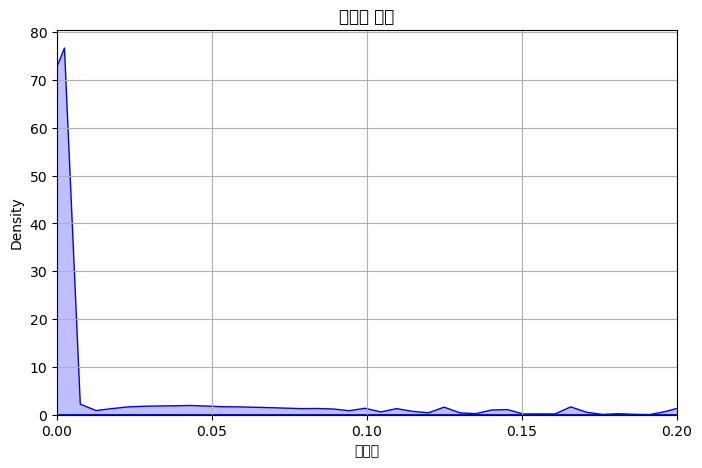

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(y, bw_adjust=0.5, fill=True, color='blue')
plt.xlim(0, 0.2)
plt.xticks(np.arange(0, 0.21, 0.05))
plt.xlabel("폐업률")
plt.title("폐업률 분포")
plt.grid(True)
plt.show()

In [28]:
np.mean(y)

0.027020235368021155

In [29]:
thresh = 0.03
y = pd.Series(np.where(y > thresh, 1, 0))

print(y[20:40])
X.shape, y.shape

20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
30    1
31    1
32    1
33    0
34    1
35    1
36    0
37    1
38    0
39    0
dtype: int32


((401159, 33), (401159,))

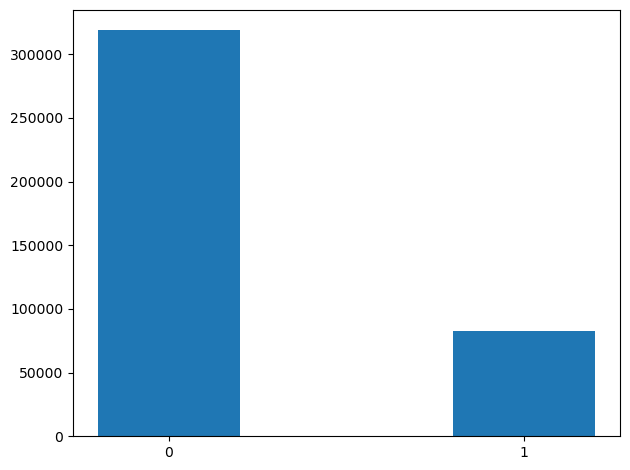

In [30]:
unique, counts = np.unique(y, return_counts=True)

# 막대그래프 그리기
plt.bar(unique, counts, width=0.4)  # width를 조절하면 막대 사이 간격 조정 가능
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

In [31]:
# 2024년 데이터를 test로

test_size = 82864

X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318295, 33), (82864, 33), (318295,), (82864,))

In [32]:
# X_train.to_csv("datasets/X_train.csv", index = False)
# X_test.to_csv("datasets/X_test.csv", index = False)
# y_train.to_csv("datasets/y_train.csv", index = False)
# y_test.to_csv("datasets/y_test.csv", index = False)

In [34]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [35]:
from sklearn.preprocessing import LabelEncoder


for col in range(4):
    encoder = LabelEncoder()

    encoder.fit(np.concatenate([X_train[:, col], X_test[:, col]]))
    X_train[:, col] = encoder.transform(X_train[:, col])
    X_test[:, col] = encoder.transform(X_test[:, col])



In [36]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)